# Easy and Powerful: Dates and Times in Pandas

## Reading date and time data in Pandas

### Loading a csv file in Pandas

In [1]:
import pandas as pd

In [10]:
rides = pd.read_csv("capital-onebike.csv")
print(rides.info())
# Start and end date dtypes are not datetime. We need to correct the dtype.

rides = pd.read_csv("capital-onebike.csv", parse_dates=["Start date", "End date"])
print(rides.info())

# if parse_date doesn't work -> pd.to_datetime()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Start date            290 non-null    object
 1   End date              290 non-null    object
 2   Start station number  290 non-null    int64 
 3   Start station         290 non-null    object
 4   End station number    290 non-null    int64 
 5   End station           290 non-null    object
 6   Bike number           290 non-null    object
 7   Member type           290 non-null    object
dtypes: int64(2), object(6)
memory usage: 18.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start date            290 non-null    datetime64[ns]
 1   End date              290 non-null    datetime64[ns]
 2  

### Making timedelta columns

In [23]:
ride_durations = rides["End date"] - rides["Start date"]
rides["Duration"] = ride_durations.dt.total_seconds()
rides["Duration"].head()

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64

## Summarizing datetime data in Pandas

### How many joyrides?

In [33]:
joyrides = (rides["Start station"] == rides["End station"])
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides["Duration"].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[joyrides]["Duration"].median()))

6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2642.50 seconds


### It's getting cold outside, W20529

In [34]:
import matplotlib.pyplot as plt

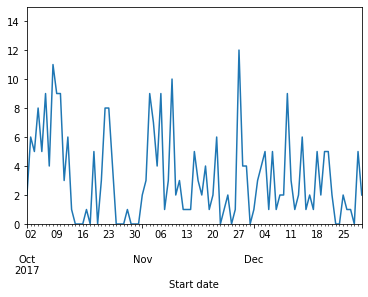

In [62]:
rides.resample("D", on="Start date").size().plot(ylim = [0,15])

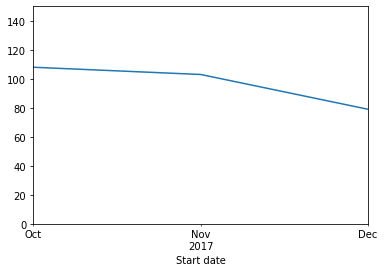

In [61]:
rides.resample("M", on="Start date").size().plot(ylim = [0,150])

### Members vs casual riders over time

In [105]:
monthly_rides = rides.resample("M", on ="Start date")["Member type"]
print(monthly_rides.value_counts() / monthly_rides.size())

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64


### Combining groupby() and resample()

In [108]:
grouped = rides.groupby('Member type')\
    .resample("M", on = "Start date")
print(grouped["Duration"].median())

Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration, dtype: float64


## Additional datetime methods in Pandas

### Timezones in Pandas

In [126]:
rides["Start date"] = rides["Start date"].dt.tz_localize("America/New_York", ambiguous="NaT")
print(rides["Start date"].iloc[0])
rides['Start date'] = rides['Start date'].dt.tz_convert('Europe/London')
print(rides["Start date"].iloc[0])

2017-10-01 15:23:25+01:00


### How long per weekday?

In [145]:
rides = pd.read_csv("capital-onebike.csv", parse_dates=["Start date", "End date"])
ride_durations = rides["End date"] - rides["Start date"]
rides["Duration"] = ride_durations.dt.total_seconds()
rides["Ride start weekday"] = rides["Start date"].dt.day_name()
print(rides.groupby("Ride start weekday")["Duration"].median())

Ride start weekday
Friday       724.5
Monday       810.5
Saturday     462.0
Sunday       902.5
Thursday     652.0
Tuesday      641.5
Wednesday    585.0
Name: Duration, dtype: float64


### How long between rides?


In [151]:
rides["Time since"] = rides["Start date"] - (rides["End date"].shift(1))
rides["Time since"] = rides["Time since"].dt.total_seconds()
monthly = rides.resample("M", on = "Start date")
print(monthly["Time since"].mean()/(60*60))

Start date
2017-10-31    5.519242
2017-11-30    7.256443
2017-12-31    9.202380
Freq: M, Name: Time since, dtype: float64
